In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("dane1.csv")
df.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Tue Jun 01 05:26:49 +0000 2021,NaN,https://twitter.com/MarkonMarek/status/1399598...,NaN,1,1399598285082476544,beata_skwarska,1.399598e+18,8.241523e+17,...,1468,1950,7,"Warszawa, Polska",MarKon#SilniRazem ***** ***✌️✌️✌️✌️✌️,MarkonMarek,85125,NaN,NaN,False
1,NaN,Tue Jun 01 04:15:56 +0000 2021,NaN,NaN,NaN,0,1399580447902994435,NaN,NaN,NaN,...,9384,4615,17,NaN,Józef Nowacki,21lupus,74846,NaN,NaN,False
2,NaN,Tue Jun 01 04:47:19 +0000 2021,NaN,NaN,https://ift.tt/3yTNxU8,1,1399588347358633987,NaN,NaN,NaN,...,30608,105,140,"Warszawa, Polska",WTP Warszawa,WTP_Warszawa,35367,NaN,http://www.wtp.waw.pl,False
3,NaN,Tue Jun 01 05:47:47 +0000 2021,NaN,NaN,NaN,0,1399603562343194625,LukaszKohut,1.399475e+18,4.267734e+08,...,688,1374,13,NaN,marcin (m³) 🇵🇱,m3_ememem,68546,NaN,NaN,False
4,NaN,Tue Jun 01 05:03:08 +0000 2021,WspieramyRodziny DzieńDziecka,https://twitter.com/j_wisniewska/status/139959...,http://m.in,54,1399592325324619780,NaN,NaN,NaN,...,23054,678,233,"województwo śląskie, PL",Jadwiga Wiśniewska,j_wisniewska,10483,NaN,http://www.jadwigawisniewska.pl,True


In [ ]:
#zamiana na date
df["created_at_dt"] = pd.to_datetime(
    df["created_at"],
    errors = "coerce"
)

#dzien tygodnia po angielsku
df["weekday_en"] = df["created_at_dt"].dt.day_name()

#zamiana na polsie znaki
day_map_en_pl = {
    "Monday": "poniedziałek",
    "Tuesday": "wtorek",
    "Wednesday": "środa",
    "Thursday": "czwartek",
    "Friday": "piątek",
    "Saturday": "sobota",
    "Sunday": "niedziela"
}

df["created_at_day_pl"] = df["weekday_en"].map(day_map_en_pl)

df[["created_at", "created_at_day_pl"]].head()

/tmp/ipython-input-125091720.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["created_at_dt"] = pd.to_datetime(


,created_at,created_at_day_pl
0,Tue Jun 01 05:26:49 +0000 2021,wtorek
1,Tue Jun 01 04:15:56 +0000 2021,wtorek
2,Tue Jun 01 04:47:19 +0000 2021,wtorek
3,Tue Jun 01 05:47:47 +0000 2021,wtorek
4,Tue Jun 01 05:03:08 +0000 2021,wtorek


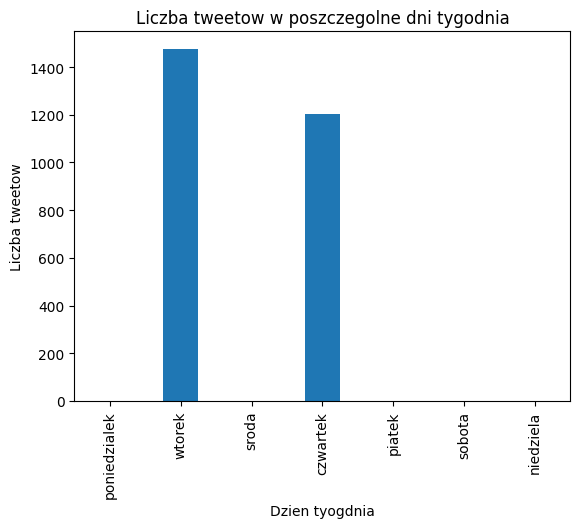

In [ ]:
import matplotlib.pyplot as plt

#liczenie ile tweetow bylo w kazdy dzien tygodnia
day_counts = df["created_at_day_pl"].value_counts()

#ustawienie kolejnosci dni tak by wykres byl od pon do ndz
order = ["poniedzialek", "wtorek", "sroda", "czwartek", "piatek", "sobota", "niedziela"]
day_counts = day_counts.reindex(order)

#wykres
plt.figure()
day_counts.plot(kind = "bar")
plt.title("Liczba tweetow w poszczegolne dni tygodnia")
plt.xlabel("Dzien tyogdnia")
plt.ylabel("Liczba tweetow")
plt.show()

day_counts = day_counts.fillna(0)